In [80]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# Read in data

In [81]:
df1 = pd.read_csv('../data/raw/cpu4.csv')
df1 = df1.sort_values(by='timestamp', ascending=True)
df1 = df1.replace({'label': {0.0: False, 1.0: True}})

In [82]:
dfcpu = pd.read_csv('../data/processed/cpu4.csv')
dfcpu
dfcpu.sort_values('datetime', inplace = True)

In [83]:
dfcpu.head()

,datetime,timestamp,value,label,date,time,month,day,hour,minute,...,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour.1,hour_sin,hour_cos
0,2016-07-24 16:00:00,1469376000,0.847300,0,2016-07-24,16:00:00,July,Sunday,16,0,...,0,0,0,0,0,0,0,16,-0.866025,-0.5
1,2016-07-24 16:05:00,1469376300,-0.036137,0,2016-07-24,16:05:00,July,Sunday,16,5,...,0,0,0,0,0,0,0,16,-0.866025,-0.5
2,2016-07-24 16:10:00,1469376600,0.074292,0,2016-07-24,16:10:00,July,Sunday,16,10,...,0,0,0,0,0,0,0,16,-0.866025,-0.5
3,2016-07-24 16:15:00,1469376900,0.074292,0,2016-07-24,16:15:00,July,Sunday,16,15,...,0,0,0,0,0,0,0,16,-0.866025,-0.5
4,2016-07-24 16:20:00,1469377200,-0.036137,0,2016-07-24,16:20:00,July,Sunday,16,20,...,0,0,0,0,0,0,0,16,-0.866025,-0.5


In [84]:
dfcpu.shape

(17568, 41)

How many anomalies do we have in the dataset?

In [85]:
print(dfcpu.label.value_counts(), "\n","--------------------------")
print("in percentage", "\n", "--------------------------")
print(dfcpu.label.value_counts(normalize=True))

0    17359
1      209
Name: label, dtype: int64 
 --------------------------
in percentage 
 --------------------------
0    0.988103
1    0.011897
Name: label, dtype: float64


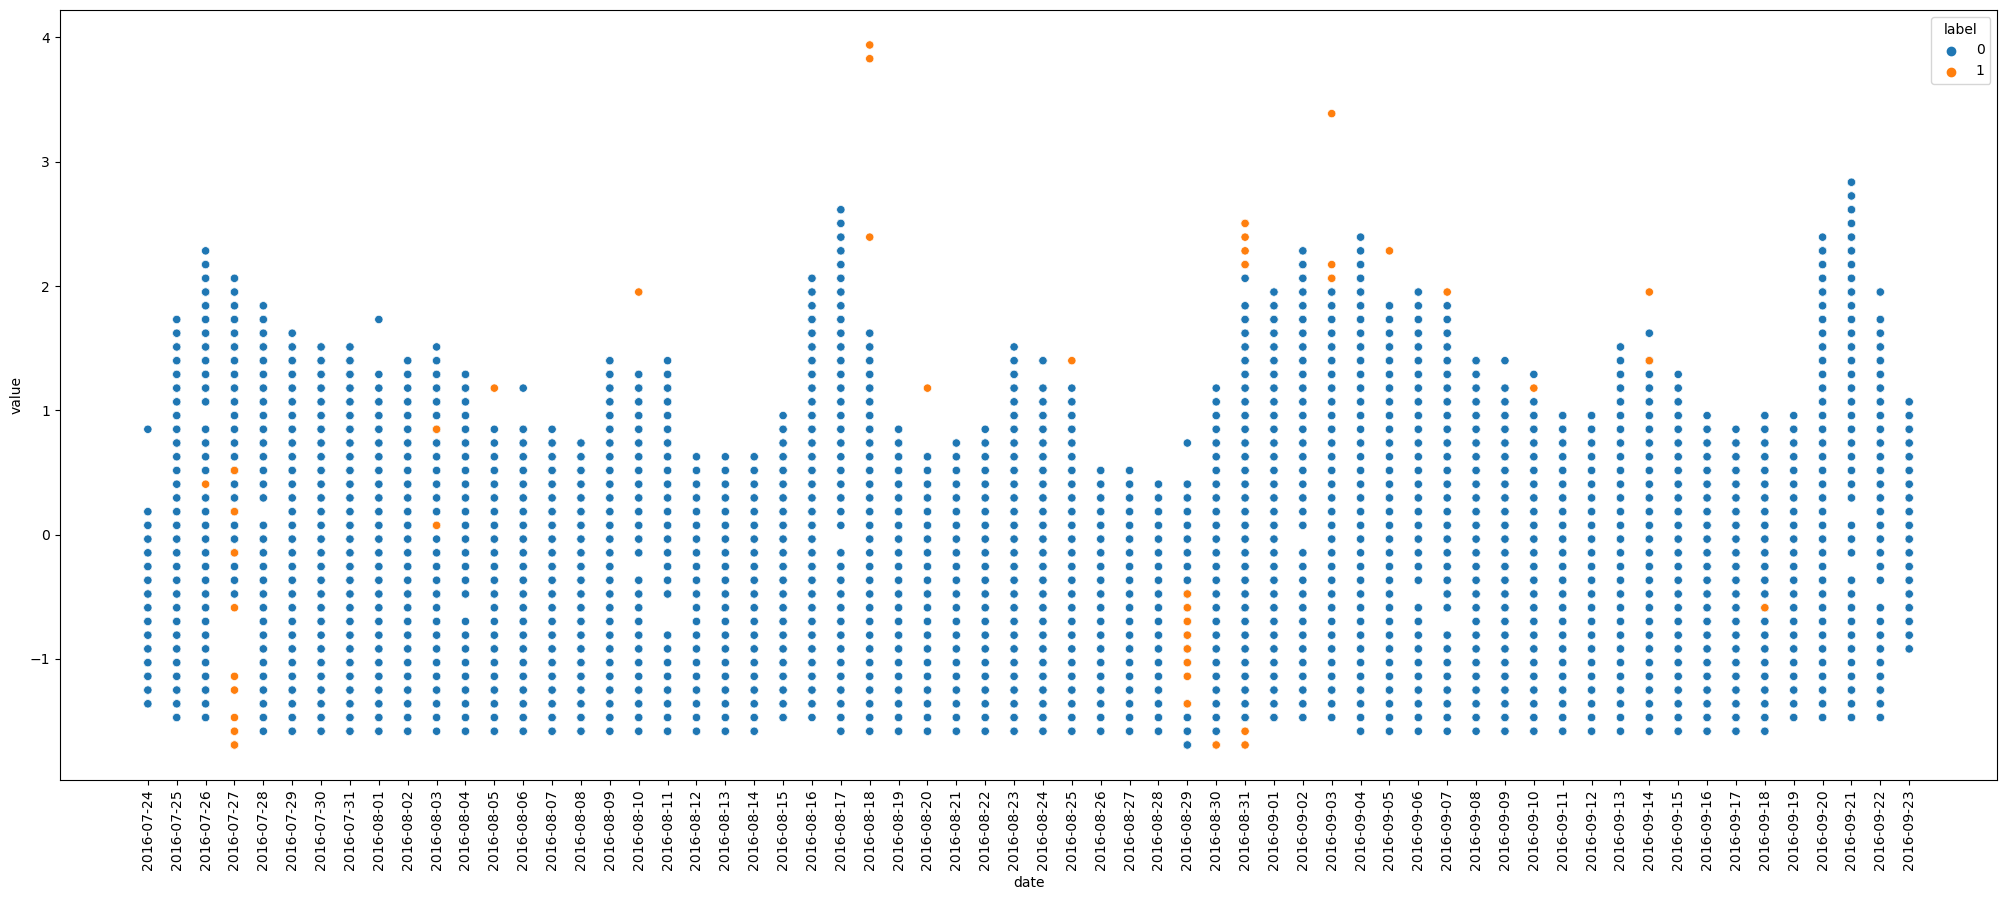

In [8]:
plt.figure(figsize=(25,10))
ax = sns.scatterplot(data=dfcpu, x="date", y="value", hue="label")
ax.tick_params(axis='x', labelrotation = 90)
# ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

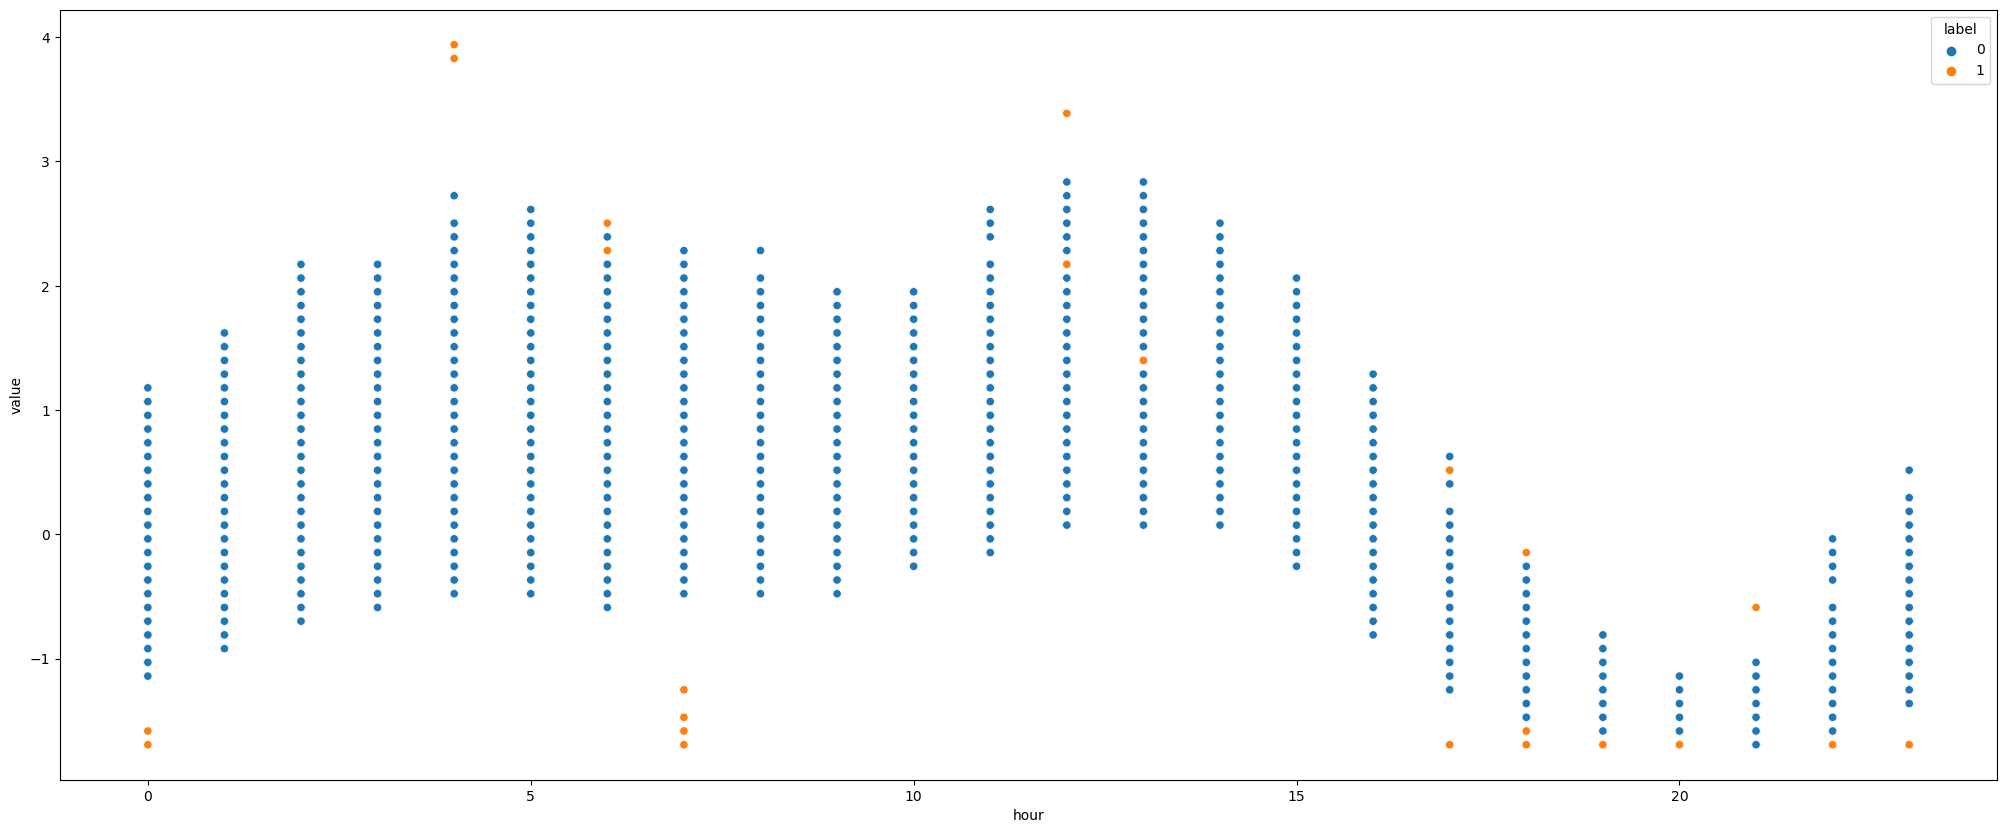

In [72]:
plt.figure(figsize=(25,10))
ax = sns.scatterplot(data=dfcpu, x="hour", y="value", hue="label")
# ax.tick_params(axis='x', labelrotation = 90)
# ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

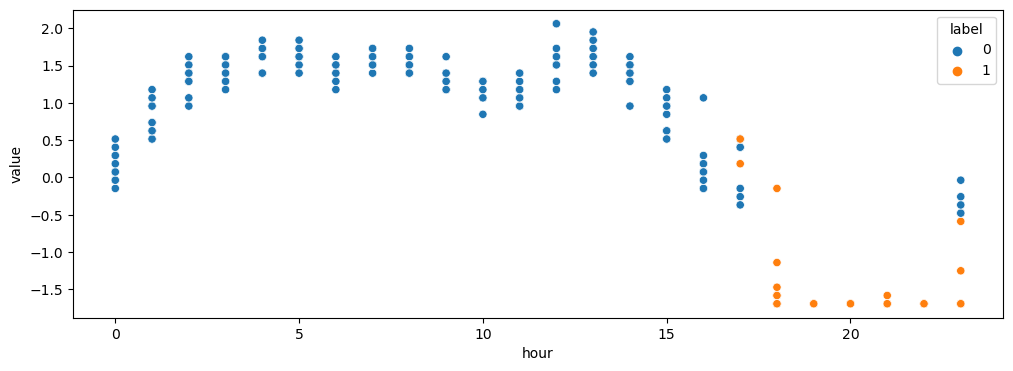

In [10]:
df1_zoom = dfcpu.loc[dfcpu.date == '2016-07-27']
plt.figure(figsize=(12,4))
ax = sns.scatterplot(data=df1_zoom, x="hour", y="value", hue="label")
# ax.tick_params(axis='x', labelrotation = 90)
plt.show()

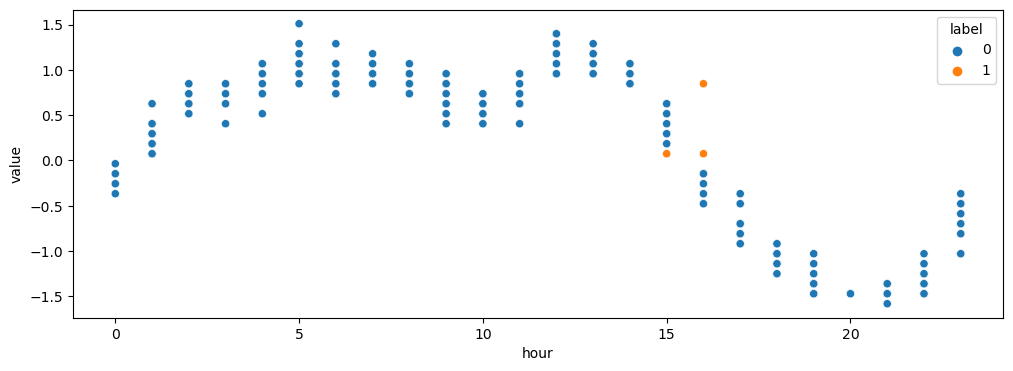

In [11]:
df1_zoom = dfcpu.loc[dfcpu.date == '2016-08-03']
plt.figure(figsize=(12,4))
sns.scatterplot(data=df1_zoom, x="hour", y="value", hue="label")
plt.show()

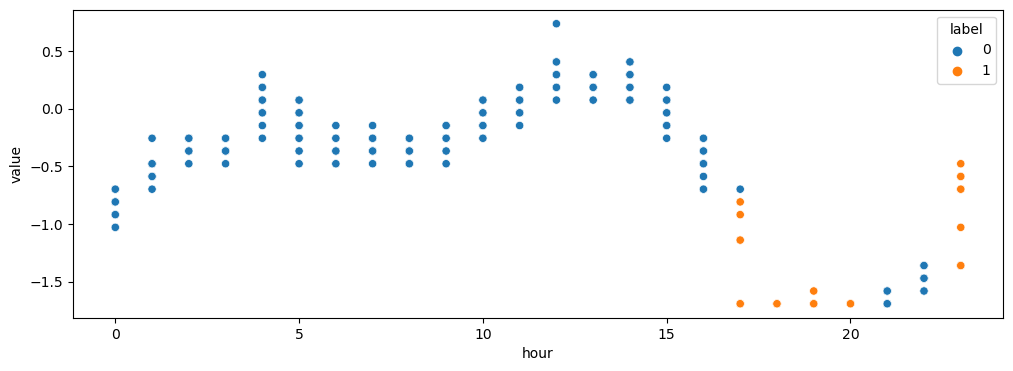

In [12]:
df1_zoom = dfcpu.loc[dfcpu.date == '2016-08-29']
plt.figure(figsize=(12,4))
sns.scatterplot(data=df1_zoom, x="hour", y="value", hue="label")
plt.show()

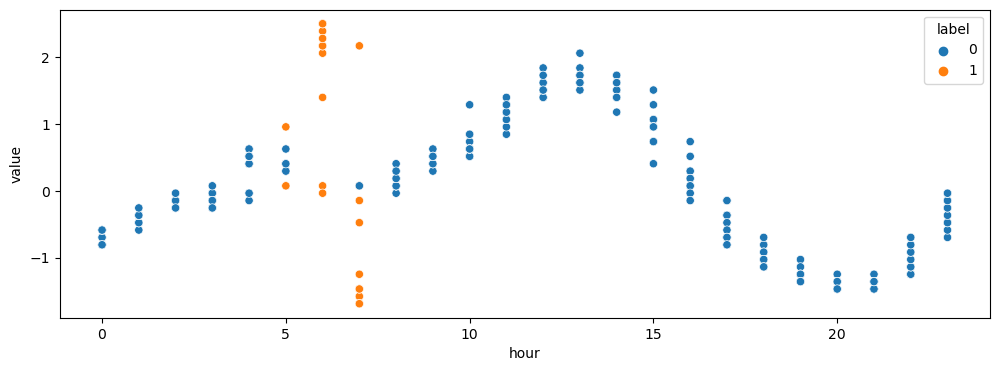

In [13]:
df1_zoom = dfcpu.loc[dfcpu.date == '2016-08-31']
plt.figure(figsize=(12,4))
sns.scatterplot(data=df1_zoom, x="hour", y="value", hue="label")
plt.show()

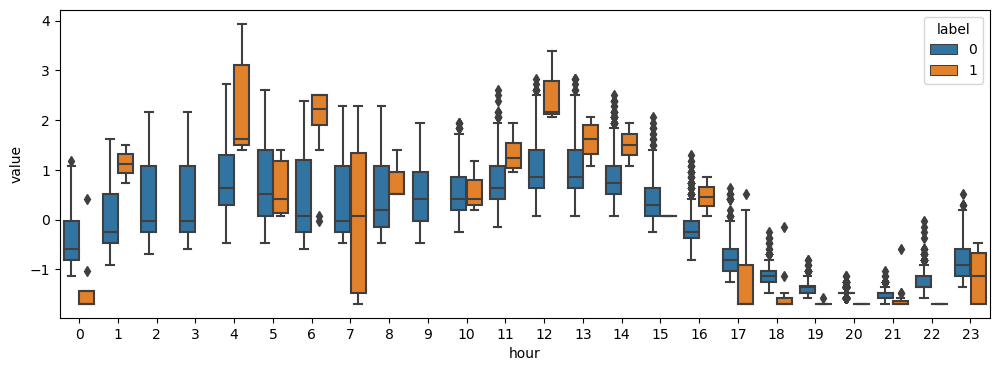

In [70]:
plt.figure(figsize=(12,4))
sns.boxplot(data=dfcpu, x="hour", y="value",hue="label")
plt.show()

In [32]:
dfcpu[dfcpu.value <-1.64].label.value_counts()

1    106
0      5
Name: label, dtype: int64

In [64]:
dfcpu[dfcpu.value <-1.59].label.value_counts()

1    106
0      5
Name: label, dtype: int64

In [53]:
dfcpu[dfcpu.value > 2.9].label.value_counts()

1    3
Name: label, dtype: int64

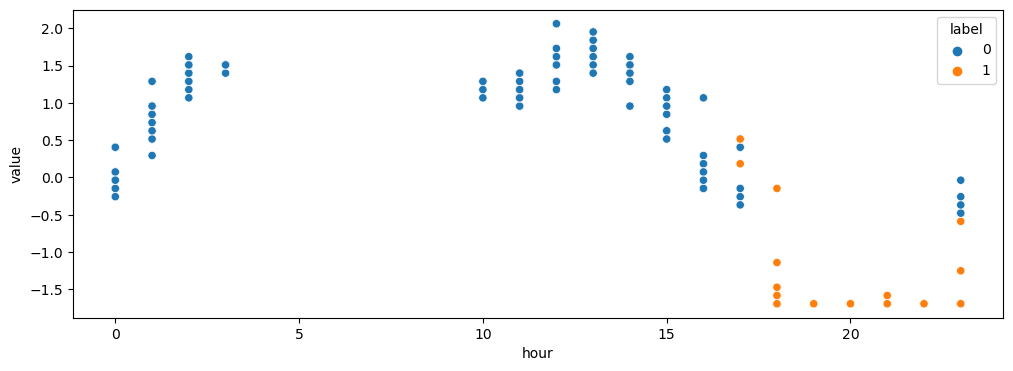

In [15]:
df1_zoom = dfcpu[800:1000]
plt.figure(figsize=(12,4))
sns.scatterplot(data=df1_zoom, x="hour", y="value", hue="label")
plt.show()

In [46]:
dfcpu = pd.read_csv('../data/processed/cpu4.csv')
dfcpu

,timestamp,value,label,datetime,date,time,month,day,hour,minute
0,1469376000,0.847300,0,2016-07-24 16:00:00,2016-07-24,16:00:00,July,Sunday,16,0
1,1469376300,-0.036137,0,2016-07-24 16:05:00,2016-07-24,16:05:00,July,Sunday,16,5
2,1469376600,0.074292,0,2016-07-24 16:10:00,2016-07-24,16:10:00,July,Sunday,16,10
3,1469376900,0.074292,0,2016-07-24 16:15:00,2016-07-24,16:15:00,July,Sunday,16,15
4,1469377200,-0.036137,0,2016-07-24 16:20:00,2016-07-24,16:20:00,July,Sunday,16,20
...,...,...,...,...,...,...,...,...,...,...
17563,1474644900,0.074292,0,2016-09-23 15:35:00,2016-09-23,15:35:00,September,Friday,15,35
17564,1474645200,0.295152,0,2016-09-23 15:40:00,2016-09-23,15:40:00,September,Friday,15,40
17565,1474645500,0.074292,0,2016-09-23 15:45:00,2016-09-23,15:45:00,September,Friday,15,45
17566,1474645800,-0.146567,0,2016-09-23 15:50:00,2016-09-23,15:50:00,September,Friday,15,50


In [17]:
# dfMon = dfcpu.loc[dfcpu.day == "Monday"][["datetime","value"]].copy()
# dfMon.set_index("datetime", inplace = True)
# dfMon

In [18]:
print(dfcpu.loc[dfcpu.label == 0]["value"].mean())
print(dfcpu.loc[dfcpu.label == 1]["value"].mean())
print(dfcpu.value.mean())

0.007407318849242522
-0.6152327667416266
-1.9637932243722306e-11


In [19]:
print(dfcpu.loc[dfcpu.label == 0]["value"].median())
print(dfcpu.loc[dfcpu.label == 1]["value"].median())
print(dfcpu.value.median())

-0.036137314
-1.6925827919999998
-0.036137314


In [87]:
from datetime import date
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import mean_absolute_error
from sklego.preprocessing import RepeatingBasisFunction

ModuleNotFoundError: No module named 'sklego'